In [20]:
library(igraph)

In [21]:
# let's increase the size of the plot
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 200)

In [22]:
g1 = graph( edges=c(1,2 , 1,3 , 1,4 , 2,1 , 3,1 , 3,5 , 3,8 , 4,1 , 4,5 , 4,6 , 5,3 , 5,4 , 5,7 , 5,8 , 6,4 , 9,10 , 9,11), directed=F ) 

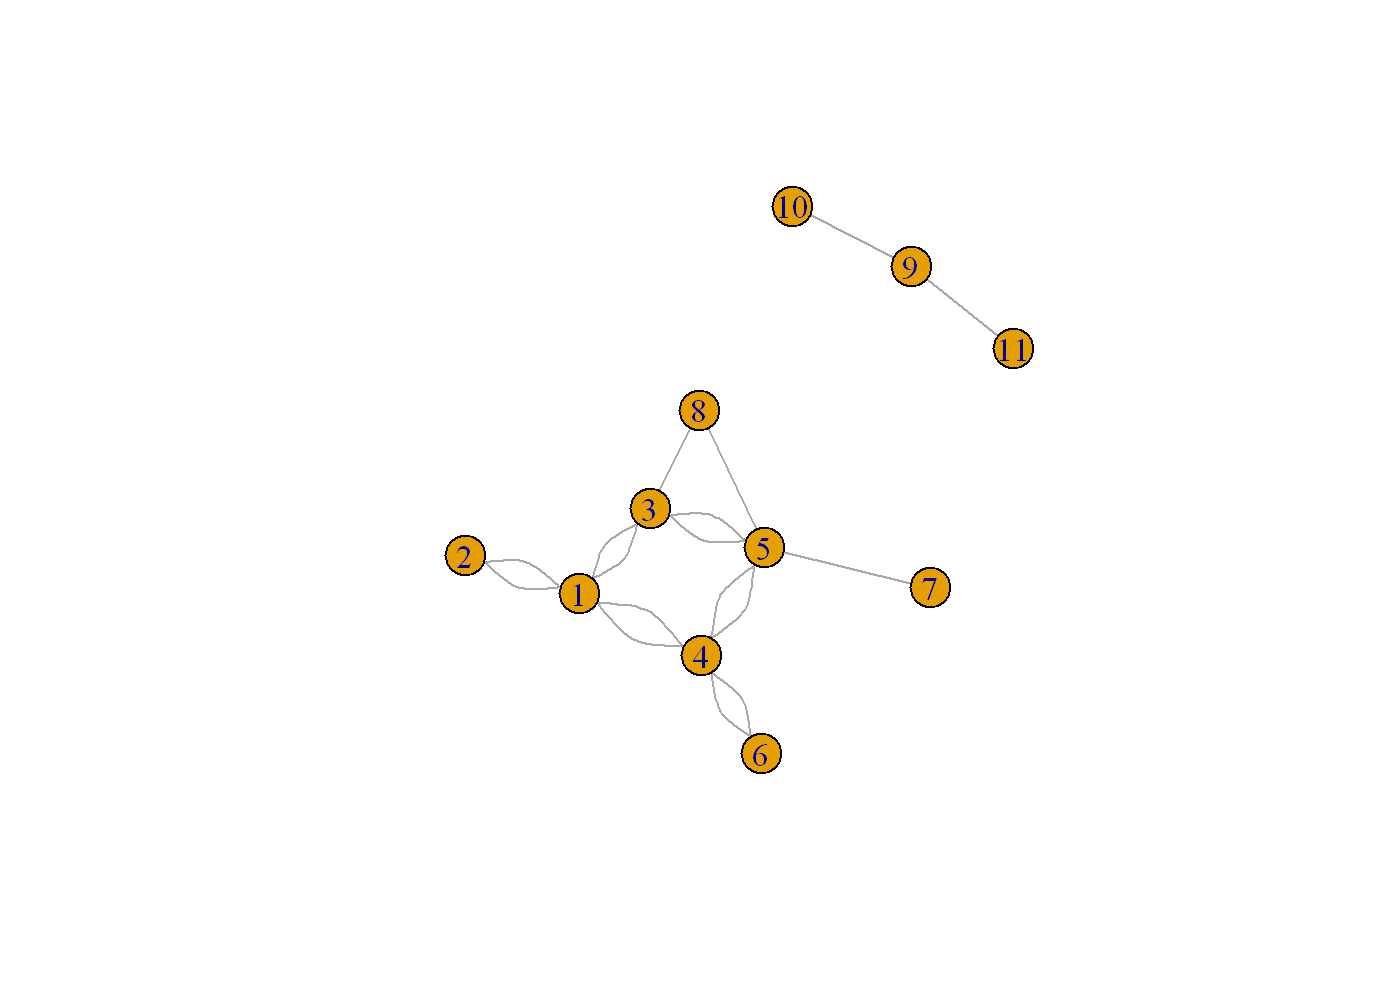

In [23]:
plot(g1)

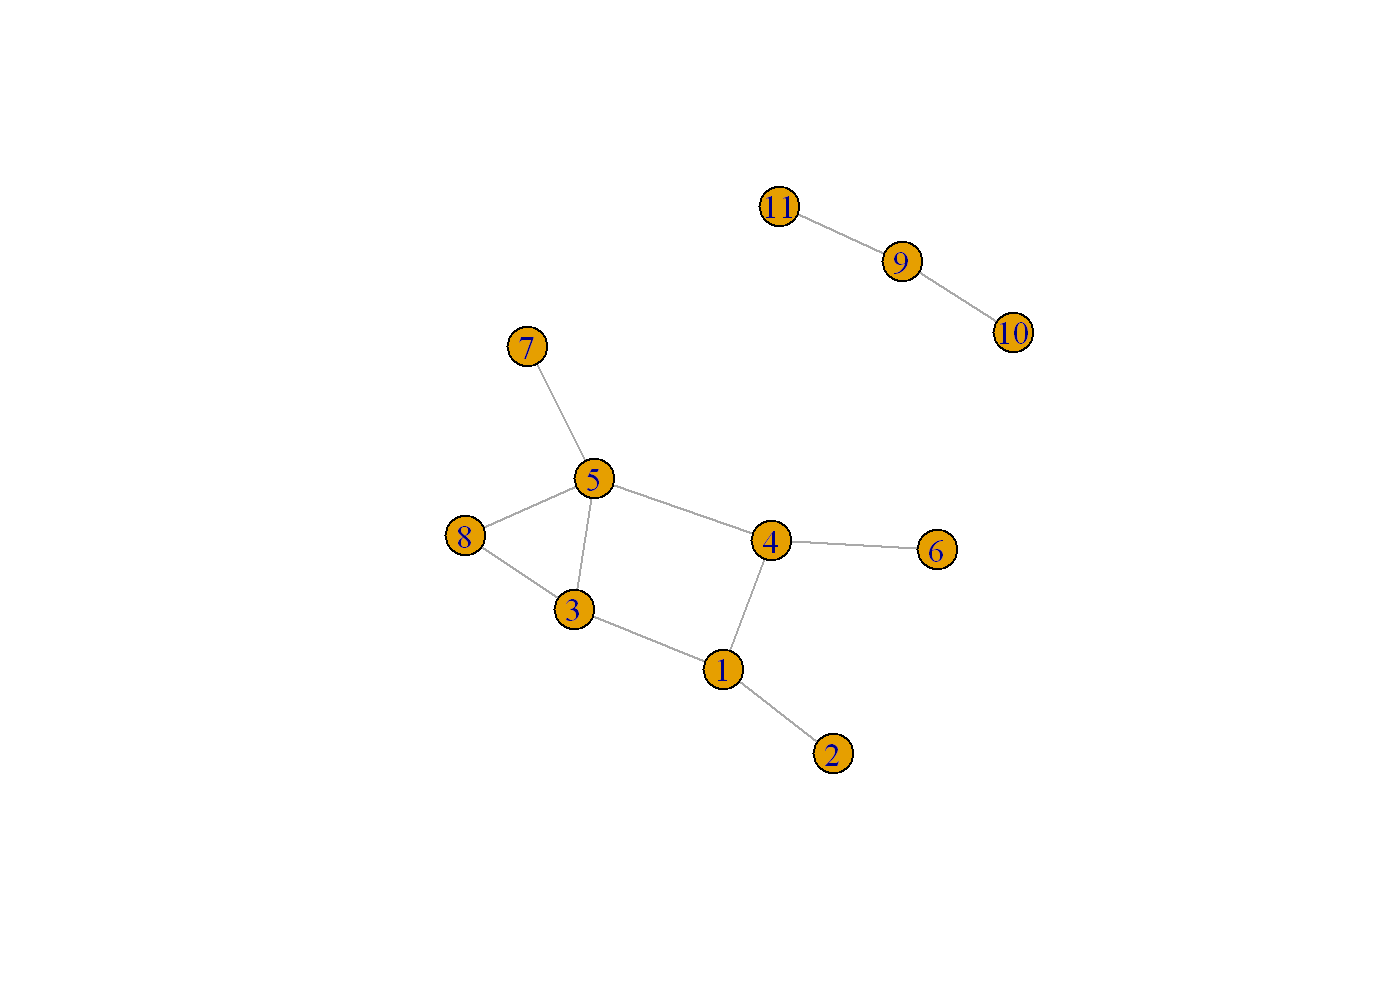

In [24]:
g1 = graph( edges=c(1,2 , 1,3 , 1,4 , 3,5 , 3,8 , 4,5 , 4,6 , 5,7 , 5,8 , 9,10 , 9,11), directed=F ) 
plot(g1)

In [25]:
help(igraph)

igraph-package {igraph},R Documentation


IGRAPH f8f66ee DN-- 5 6 -- 
+ attr: name (v/c), age (v/n), gender (v/c), same.dept (e/l),
| friendship (e/n), advice (e/n)
+ edges from f8f66ee (vertex names):
[1] Bob      ->Alice Cecil    ->Bob   Cecil    ->Alice David    ->Alice
[5] David    ->Bob   Esmeralda->Alice


,name,age,gender
,<chr>,<dbl>,<chr>
Alice,Alice,48,F
Bob,Bob,33,M
Cecil,Cecil,45,F
David,David,34,M
Esmeralda,Esmeralda,21,F


,from,to,same.dept,friendship,advice
,<chr>,<chr>,<lgl>,<dbl>,<dbl>
1,Bob,Alice,FALSE,4,4
2,Cecil,Bob,FALSE,5,5
3,Cecil,Alice,TRUE,5,5
4,David,Alice,FALSE,2,4
5,David,Bob,FALSE,1,2
6,Esmeralda,Alice,TRUE,1,3


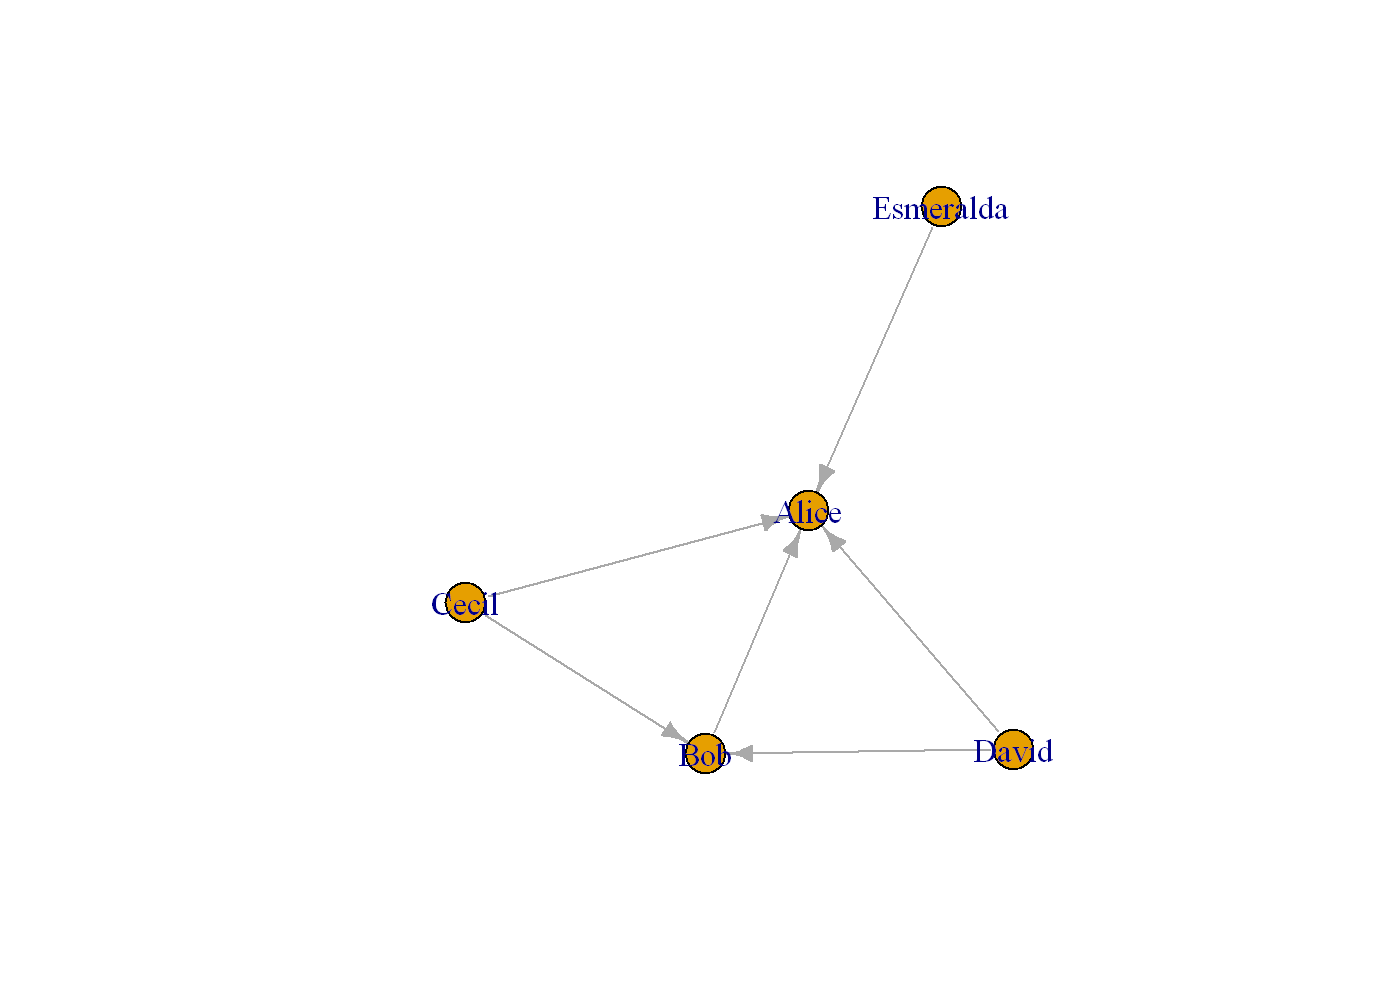

In [26]:
actors <- data.frame(name=c("Alice", "Bob", "Cecil", "David",
                            "Esmeralda"),
                     age=c(48,33,45,34,21),
                     gender=c("F","M","F","M","F"))
relations <- data.frame(from=c("Bob", "Cecil", "Cecil", "David",
                               "David", "Esmeralda"),
                        to=c("Alice", "Bob", "Alice", "Alice", "Bob", "Alice"),
                        same.dept=c(FALSE,FALSE,TRUE,FALSE,FALSE,TRUE),
                        friendship=c(4,5,5,2,1,1), advice=c(4,5,5,4,2,3))
g <- graph_from_data_frame(relations, directed=TRUE, vertices=actors)
print(g, e=TRUE, v=TRUE)

plot(g)

## The opposite operation
as_data_frame(g, what="vertices")
as_data_frame(g, what="edges")


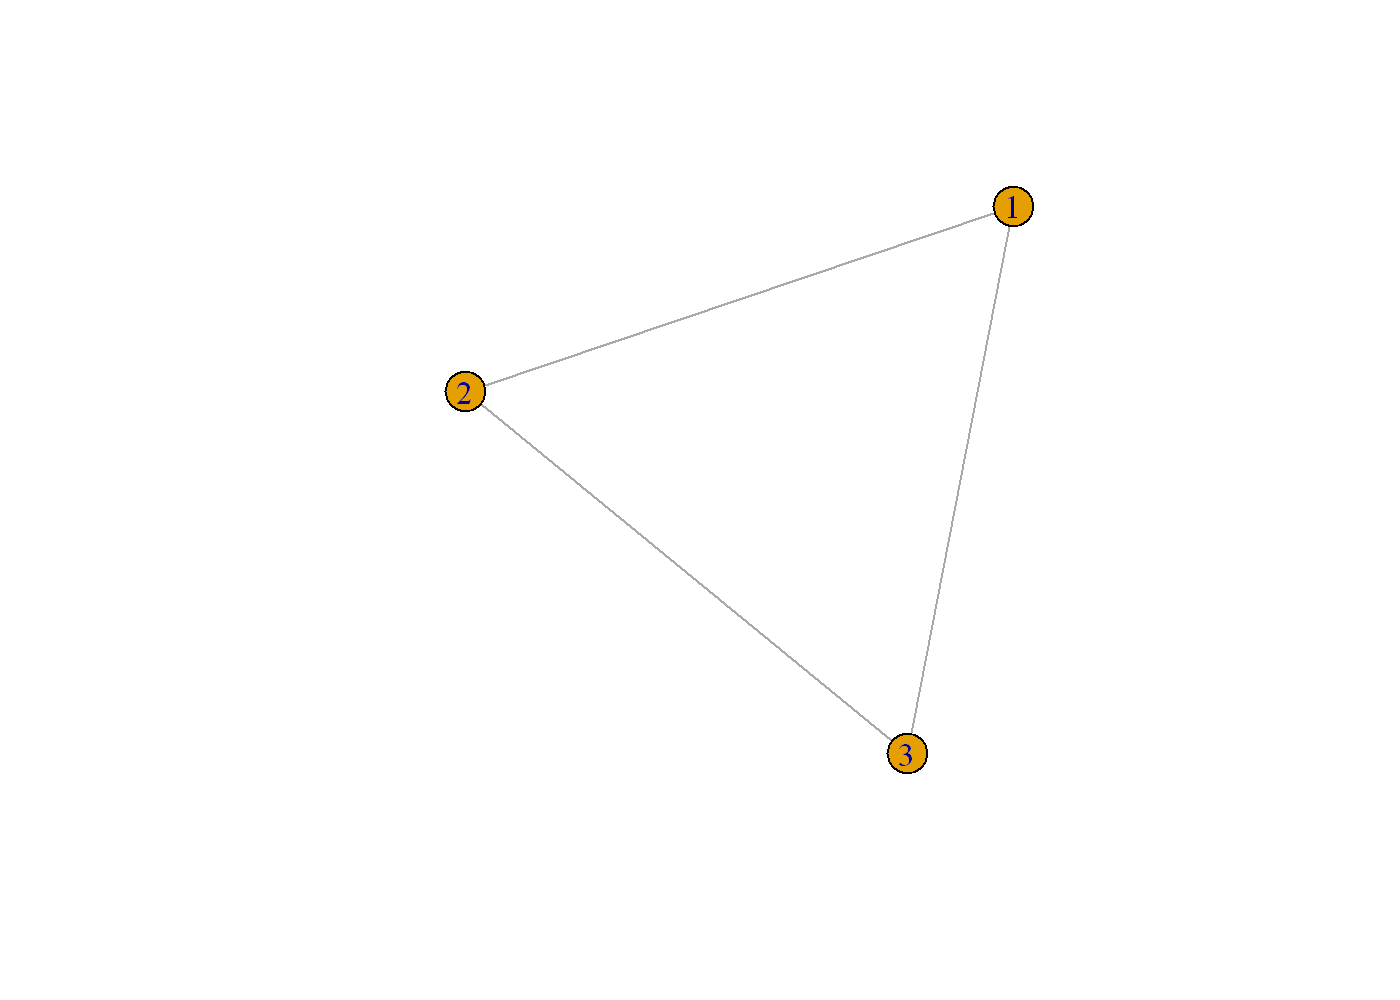

In [27]:
relations <- data.frame(from=c(1,1,2),
                        to=c(2,3,3)
                        )
g <- graph_from_data_frame(relations, directed=FALSE)
plot(g)

In [28]:
library(tidyr)

expand.grid(c(1,2,3), c(1,2,3))


Attaching package: 'tidyr'


The following object is masked from 'package:igraph':

    crossing




Var1,Var2
<dbl>,<dbl>
1,1
2,1
3,1
1,2
2,2
3,2
1,3
2,3
3,3


In [29]:
library(gtools)
help(combinations)


Attaching package: 'gtools'


The following object is masked from 'package:igraph':

    permute




combinations {gtools},R Documentation
n,Size of the source vector
r,Size of the target vectors
v,Source vector. Defaults to 1:n
set,Logical flag indicating whether duplicates should be removed from the source vector v. Defaults to TRUE.
repeats.allowed,Logical flag indicating whether the constructed vectors may include duplicated values. Defaults to FALSE.


In [30]:
combinations(n=3,r=3, v=c(1,2,3), repeats.allowed=FALSE)

1,2,3


In [31]:
library(utils)

m = combn(c(1,2,3),2)
m
m[,1]

1,1,2
2,3,3


[1] 1 2

In [32]:
m = combn(c(1,2,3,4,5,6,7,8,9),2)
m
m[,1]

1,1,1,1,1,1,1,1,2,2,⋯,5,5,5,5,6,6,6,7,7,8
2,3,4,5,6,7,8,9,3,4,⋯,6,7,8,9,7,8,9,8,9,9


[1] 1 2

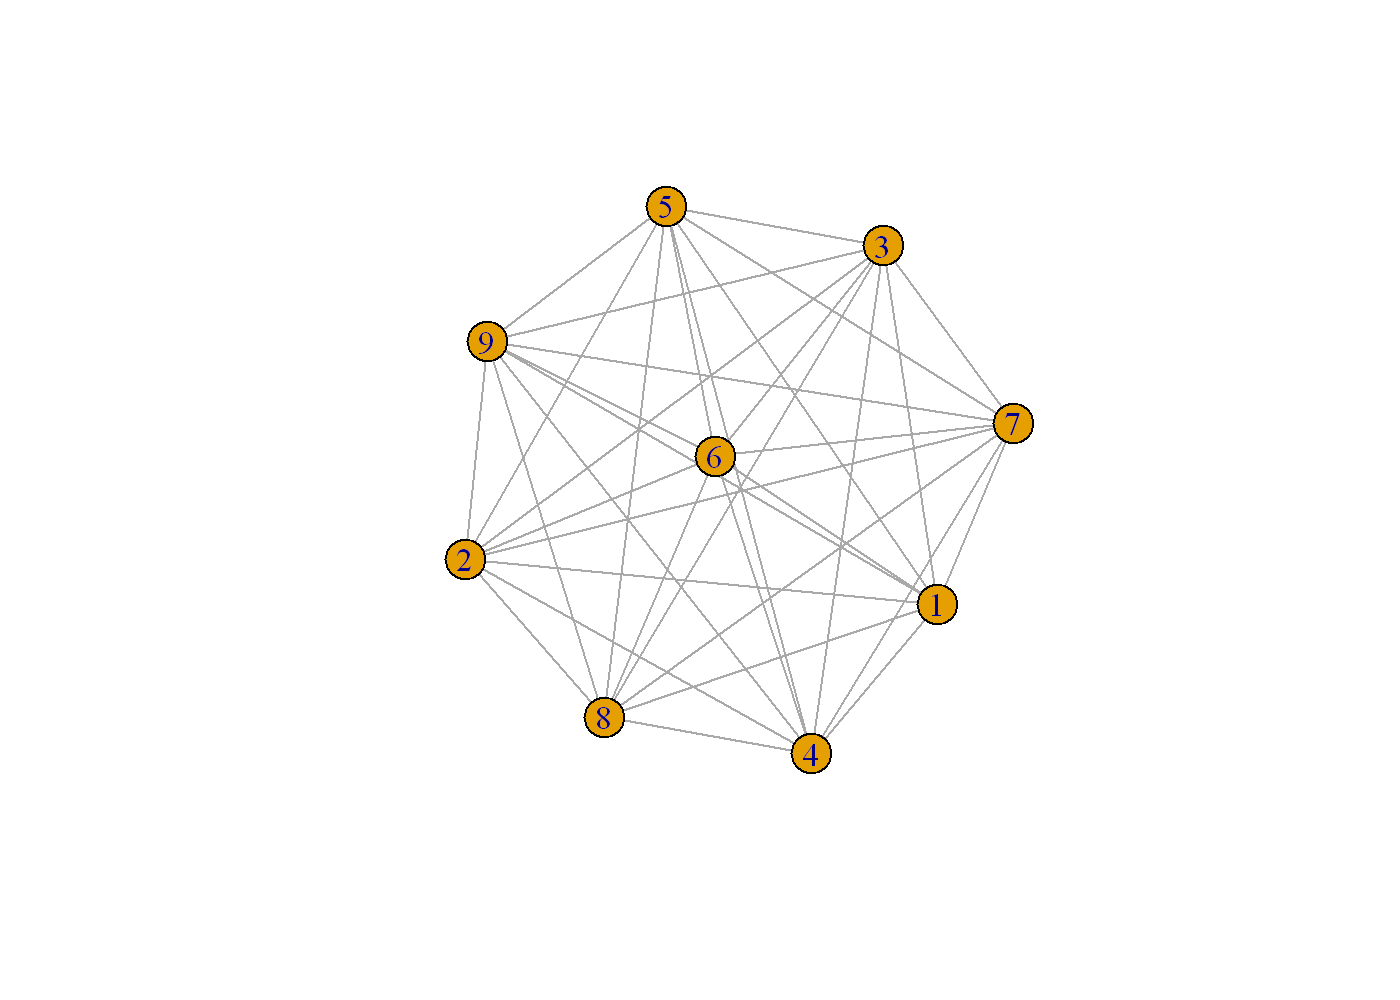

In [33]:
relations <- data.frame(from=m[1,],
                        to=m[2,]
                        )
g <- graph_from_data_frame(relations, directed=FALSE)
plot(g)

In [34]:
m1 = combn(c(1,2,3,4,5,6,7,8,9),2)
m2 = combn(c(20,21,22),2)
m3 = combn(c(1,21),2)
m4 = combn(c(1,21),2)
m5 = combn(c(1,21),2)
m = cbind(m1,m2)
m = cbind(m,m3)
m = cbind(m,m4)
m = cbind(m,m5)

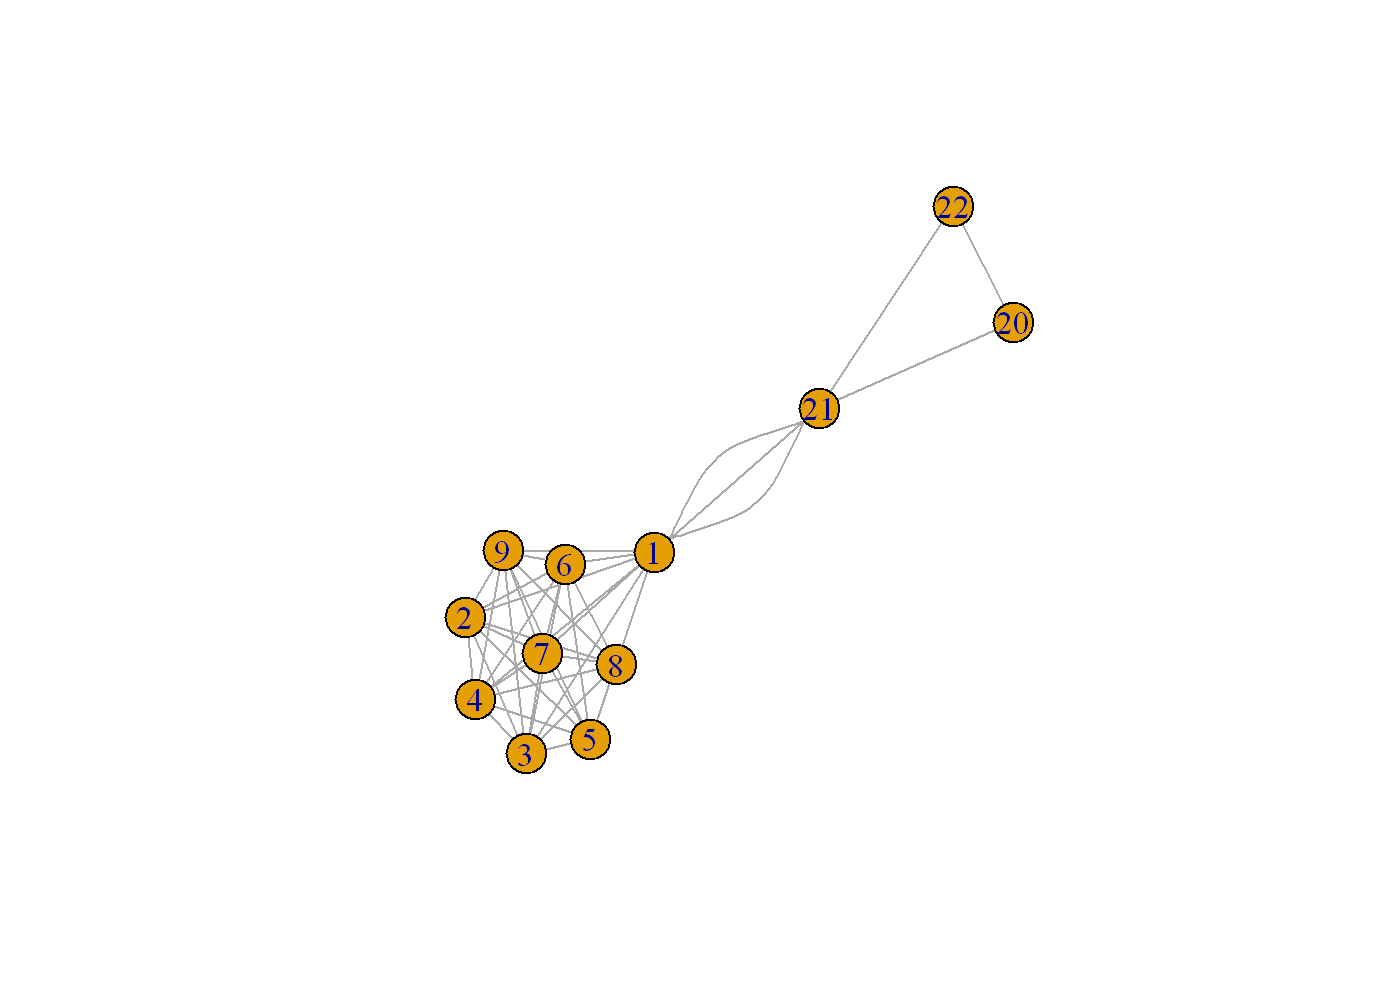

In [35]:
relations <- data.frame(from=m[1,],
                        to=m[2,]
                        )
g <- graph_from_data_frame(relations, directed=FALSE)
plot(g)

In [36]:
names = data.frame(nconst=c("t1","t2","t3"), knownForTitles1=c("a1", "a2", "a3"), knownForTitles2=c("a2", "a4", "a1"), knownForTitles3=c("a3", "a3", "a2"))

In [37]:
df = data.frame(nconst=rep(names$nconst, times=3), knownForTitles=NA)

In [38]:
df

nconst,knownForTitles
<fct>,<lgl>
t1,NA
t2,NA
t3,NA
t1,NA
t2,NA
t3,NA
t1,NA
t2,NA
t3,NA


In [39]:
knownForTitles = c()
for( col in names[,-1]){
   col=as.vector(col)
   knownForTitles = c(knownForTitles, col)
}


In [40]:
class(knownForTitles)

[1] "character"

In [41]:
df$knownForTitles = knownForTitles

In [42]:
df

nconst,knownForTitles
<fct>,<chr>
t1,a1
t2,a2
t3,a3
t1,a2
t2,a4
t3,a1
t1,a3
t2,a3
t3,a2


In [43]:
split_df = split(df, df$knownForTitles)

In [44]:
str(split_df)

List of 4
 $ a1:'data.frame':	2 obs. of  2 variables:
  ..$ nconst        : Factor w/ 3 levels "t1","t2","t3": 1 3
  ..$ knownForTitles: chr [1:2] "a1" "a1"
 $ a2:'data.frame':	3 obs. of  2 variables:
  ..$ nconst        : Factor w/ 3 levels "t1","t2","t3": 2 1 3
  ..$ knownForTitles: chr [1:3] "a2" "a2" "a2"
 $ a3:'data.frame':	3 obs. of  2 variables:
  ..$ nconst        : Factor w/ 3 levels "t1","t2","t3": 3 1 2
  ..$ knownForTitles: chr [1:3] "a3" "a3" "a3"
 $ a4:'data.frame':	1 obs. of  2 variables:
  ..$ nconst        : Factor w/ 3 levels "t1","t2","t3": 2
  ..$ knownForTitles: chr "a4"


In [45]:
split_df

,nconst,knownForTitles
,<fct>,<chr>
1,t1,a1
6,t3,a1
,nconst,knownForTitles
,<fct>,<chr>
2,t2,a2
4,t1,a2
9,t3,a2
,nconst,knownForTitles
,<fct>,<chr>


In [46]:
split_df[[1]]
split_df[[1]][1]
class(split_df[[1]][1])
split_df[[1]][[1]]
class(split_df[[1]][[1]])
as.vector(split_df[[1]][[1]])
class(as.vector(split_df[[1]][[1]]))

,nconst,knownForTitles
,<fct>,<chr>
1,t1,a1
6,t3,a1


,nconst
,<fct>
1,t1
6,t3


[1] "data.frame"

[1] t1 t3
Levels: t1 t2 t3

[1] "factor"

[1] "t1" "t3"

[1] "character"

In [47]:
length(split_df)

[1] 4

In [48]:
library(utils)

In [49]:
combn(as.vector(split_df[[1]][[1]]), 2)

t1
t3


In [50]:
combn(as.vector(split_df[[2]][[1]]), 2)

t2,t2,t1
t1,t3,t3


In [51]:
combn(as.vector(split_df[[4]][[1]]), 2)

ERROR: Error in combn(as.vector(split_df[[4]][[1]]), 2): n < m


In [ ]:
length(split_df[[4]][[1]])

In [ ]:
combination_matrix = c()
for( i in 1:length(split_df)){
    if(length(split_df[[i]][[1]]) > 1){
        temp = combn(as.vector(split_df[[i]][[1]]), 2)
        combination_matrix = cbind(combination_matrix, temp)
    }
}

In [ ]:
combination_matrix

In [ ]:
relations <- data.frame(from=combination_matrix[1,],
                        to=combination_matrix[2,]
                        )
g <- graph_from_data_frame(relations, directed=FALSE)
plot(g)

In [ ]:
split_df_person = split(df, df$nconst)

In [ ]:
split_df_person

In [ ]:
combination_matrix_person = c()
for( i in 1:length(split_df_person)){
    if(length(split_df_person[[i]][[2]]) > 1){
        temp = combn(as.vector(split_df_person[[i]][[2]]), 2)
        combination_matrix_person = cbind(combination_matrix_person, temp)
    }
}

In [ ]:
combination_matrix_person

In [ ]:
relations_person <- data.frame(from=combination_matrix_person[1,],
                        to=combination_matrix_person[2,]
                        )
g_person <- graph_from_data_frame(relations_person, directed=FALSE)
plot(g_person)

In [ ]:
ratings = data.frame(tconst = c("a1", "a2", "a3", "a4"), averageRating = c(1,1,9,9), color=NA)

In [ ]:
rate_movie = c()

for( movie in combination_matrix_person[1,]){
    #print(movie)
    rating = ratings[ ratings$tconst==movie,]$averageRating
    #print(rating)
    if(rating <= 3){
        rate_movie = cbind(rate_movie, "red")
    }
    else{
        rate_movie = cbind(rate_movie, "green")
    }
}

In [ ]:
rate_movie

In [ ]:
ratings[ratings$averageRating <= 3, ]$color = "red" 
ratings[ratings$averageRating >= 7, ]$color = "green"

In [ ]:
ratings

In [ ]:
V(g_person)$color = ratings$color

In [ ]:
plot(g_person)

In [ ]:
combination_matrix = matrix(c(1,2, 3,2), nrow = 2)

In [ ]:
relations <- data.frame(from=combination_matrix[1,],
                        to=combination_matrix[2,]
                        )
g <- graph_from_data_frame(relations, directed=FALSE)
g = add_vertices(g, 5, name=c("4","5","6","7","8"))
plot(g)

In [ ]:
V(g)$name